# Google AI Studio
This notebook is a basic example of how to use Google AI Studio in Jupyter Notebook/Python.

Let's import the necessary libraries:

In [1]:
import os
from dotenv import load_dotenv
from google import genai
from google.genai import types
from PIL import Image
from io import BytesIO

load_dotenv()

True

### Start by setting up a client

In [2]:
client = genai.Client(api_key=os.getenv("GOOGLE_API_KEY"))

## Generate text


In [3]:
model = "gemini-2.5-flash"

response = client.models.generate_content(
    model=model,
    contents="Tell me a joke about AI.",
)

print(response.text)

Why did the AI break up with the human?

Because it just couldn't process all the illogical emotions!


## Generating images
We can use Gemini 2.5 flash image preview to create images.

Here's an image of an AI-themed restaurant! 


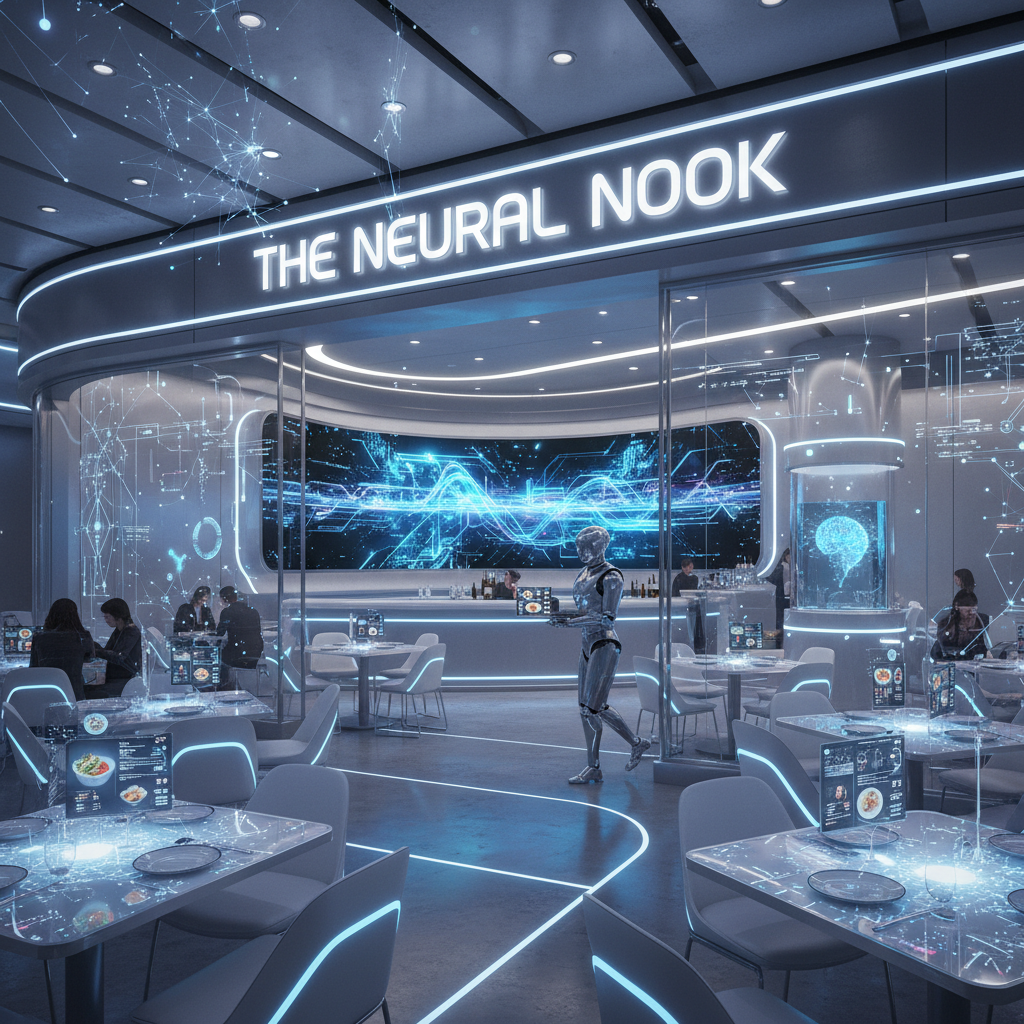

In [7]:
prompt = (
    "Create an image of a AI-themed restaurant"
)

response = client.models.generate_content(
    model="gemini-2.5-flash-image-preview",
    contents=[prompt],
)

for part in response.candidates[0].content.parts:
    if part.text is not None:
        print(part.text)
    elif part.inline_data is not None:
        image = Image.open(BytesIO(part.inline_data.data))
        image.save("restaurant.png")

image

## Edit images
We can use Gemini 2.5 flash image preview to edit parts of the image while keeping the original image almost intact.

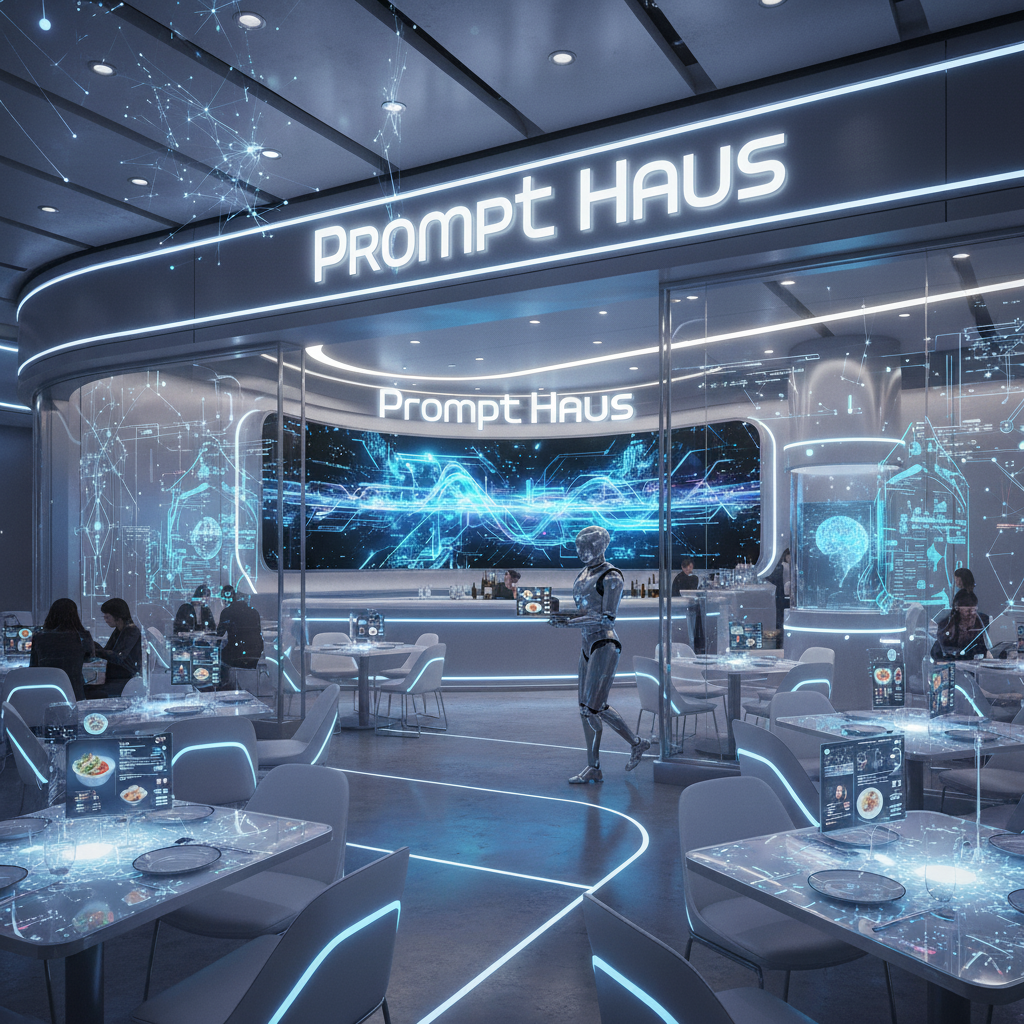

In [8]:
prompt = (
    "Add large logo on the wall that says 'Prompt Haus'"
)

image = Image.open("restaurant.png")

response = client.models.generate_content(
    model="gemini-2.5-flash-image-preview",
    contents=[prompt, image],
)

for part in response.candidates[0].content.parts:
    if part.text is not None:
        print(part.text)
    elif part.inline_data is not None:
        image = Image.open(BytesIO(part.inline_data.data))
        image.save("restaurant_with_logo.png")

image